# Anonymization examples
### References:
#### [1] Josep Domingo-Ferrer and Vicenç Torra, "Ordinal, continuous and heterogeneous k-anonymity through microaggregation", Data Mining and Knowledge Discovery, Vol. 11, pp. 195-212, Sep 2005. DOI: https://doi.org/10.1007/s10618-005-0007-5
#### [2] Jordi Soria-Comas, Josep Domingo-Ferrer, David Sánchez and Sergio Martínez, "t-Closeness through microaggregation: strict privacy with enhanced utility preservation", IEEE Transactions on Knowledge and Data Engineering, Vol. 27, no. 11, pp. 3098-3110, Oct 2015. DOI: https://doi.org/10.1109/TKDE.2015.2435777
#### [3] Jordi Soria-Comas, Josep Domingo-Ferrer, David Sánchez and Sergio Martínez, "Enhancing data utility in differential privacy via microaggregation-based k-anonymity", The VLDB Journal, Vol. 23, no. 5, pp. 771-794, Sep 2014. DOI: https://doi.org/10.1007/s00778-014-0351-4
#### [4] Josep Domingo-Ferrer and Vicenç Torra, "Disclosure risk assessment in statistical data protection", Journal of Computational and Applied Mathematics, Vol. 164, pp. 285-293, Mar 2004. DOI: https://doi.org/10.1016/S0377-0427(03)00643-5

## 1. k-Anomymity via MDAV

### Toy data set that includes all available attribute types

In [9]:
from anonymization.src.entities.dataset_CSV import Dataset_CSV
from anonymization.src.entities.dataset_DataFrame import Dataset_DataFrame
from anonymization.src.algorithms.anonymization_scheme import Anonymization_scheme
from anonymization.src.algorithms.k_anonymity import K_anonymity
from anonymization.src.algorithms.mdav import Mdav
from anonymization.src.utils import utils

#### Following, it is indicated the path to the csv file containing the data set and the path to the xml file describing the attributes in the data set. Inside the xml file, there is a detailed descritpion about how to fill this xml file in order to properly configure the different attribute types in the data set  

In [10]:
path_csv = "./anonymization/input_datasets/toy_all_types.csv"
path_settings = "./anonymization/input_datasets/metadata_toy_all_types.xml"
data_frame = utils.read_dataframe_from_csv(path_csv)

#### 1.1 The data set is loaded from a DataFrame passed as parameter

In [11]:
dataset = Dataset_DataFrame(data_frame, path_settings)
dataset.description()

Loading dataset
Dataset loaded: ./anonymization/input_datasets/toy_all_types.csv
Records loaded: 10
Dataset: ./anonymization/input_datasets/toy_all_types.csv
Dataset head:


,hours-per-week,age,income,date,occupation,native-country,location,datetime
0,40,39.5,23546,1/11/2016,clerk,United_States,43.8430139:10.507994,2011-02-03 08:34:04
1,13,50.3,10230,6/12/2015,executive,United_States,43.54427:10.32615,2011-02-03 09:34:04
2,40,38.0,0,19/7/2015,cleaner,United_States,43.70853:10.4036,2011-02-03 10:34:04
3,40,53.1,152000,25/7/2015,cleaner,United_States,43.77925:11.24626,2011-02-04 10:34:04
4,40,28.8,54120,10/8/2016,specialist,Cuba,43.8430139:10.507994,2011-02-04 08:34:04



Dataset description:
Data set: ./anonymization/input_datasets/toy_all_types.csv
Records: 10
Attributes:


,Name,Attribute_type,Sensitivity_type
0,hours-per-week,numerical_discrete,quasi_identifier
1,age,numerical_continuous,quasi_identifier
2,income,numerical_discrete,confidential
3,date,date,quasi_identifier
4,occupation,plain_categorical,quasi_identifier
5,native-country,semantic_categorical_wordnet,quasi_identifier
6,location,coordinate,quasi_identifier
7,datetime,datetime,quasi_identifier


#### 1.2 The data set is anonymized, in this case, applying k_anonymity via MDAV with a privacy level of k=3

In [12]:
k = 3
anonymization_scheme = K_anonymity(dataset, k)
algorithm = Mdav()
anonymization_scheme.calculate_anonymization(algorithm)

Anonymizing k-Anonymity, k = 3 via MDAV



Anonymization runtime: 0:00:00


#### 1.3 Information loss metrics are calculated by comparing original and anonymized data set  
Metrics calculated: Sum of Square Error (SSE) and, for each attribute, mean and variance


In [13]:
information_loss = Anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset)
information_loss.description()

Calculating information loss metrics

Information loss metrics:
SSE: 0.874


,Name,Original mean,Anonymized mean,Original variance,Anonymized variance
0,hours-per-week,36.4,36.3,1.302000e+02,5.790000e+01
1,age,42.33,42.35,6.654810e+01,3.991650e+01
2,income,35771.4,35771.4,1.687522e+09,1.687522e+09
3,date,18/2/2016,18/2/2016,3.245814e+14,8.173050e+13
4,occupation,executive,executive,6.000000e-01,6.000000e-01
5,native-country,location,psychological_feature,3.369641e-01,3.600000e-01
6,location,43.70666917:10.495949199999998,43.70666917:10.495949200000002,8.156504e-02,1.203712e-02
7,datetime,2011-02-04 09:46:04,2011-02-04 09:46:04,4.491418e+09,3.813696e+08


#### 1.4 Disclosure risk is calculated via record linkage between anonymized and original data set  
The disclosure risk estimates the percentage of anonymized records that correct match with the original ones

In [14]:
disclosure_risk = Anonymization_scheme.calculate_record_linkage(dataset, anonymization_scheme.anonymized_dataset)
disclosure_risk.description()

Calculating record linkage (disclosure risk)



Disclosure risk: 2.000 (20.00%)


#### 1.5 The anonymized data set can be saved to a csv formated file

In [15]:
anonymization_scheme.save_anonymized_dataset("./anonymization/output_datasets/toy_all_types_anom.csv")

'Dataset saved: ./anonymization/output_datasets/toy_all_types_anom.csv'

#### 1.6 The anonymized data set can be converted to DataFrame

In [16]:
df_anonymized = anonymization_scheme.anonymized_dataset_to_dataframe()
df_anonymized.head()

,hours-per-week,age,income,date,occupation,native-country,location,datetime
0,27,45.5,23546,24/3/2016,executive,location,43.73470695:10.4364345,2011-02-04 09:34:04
1,27,45.5,10230,24/3/2016,executive,location,43.73470695:10.4364345,2011-02-04 09:34:04
2,42,47.7,0,18/9/2015,cleaner,region,43.67735:10.65867,2011-02-04 02:54:04
3,42,47.7,152000,18/9/2015,cleaner,region,43.67735:10.65867,2011-02-04 02:54:04
4,43,32.8,54120,4/6/2016,specialist,location,43.69860463333333:10.412581333333334,2011-02-04 16:54:04


#### 1.7 The previously saved anonymized and original data sets can be loaded in order to calculate the privacy metrics a posteriori

In [17]:
path_csv = "./anonymization/input_datasets/toy_all_types.csv"
path_settings = "./anonymization/input_datasets/metadata_toy_all_types.xml"
df = utils.read_dataframe_from_csv(path_csv)
dataset_original = Dataset_DataFrame(df, path_settings)
dataset_original.description()

Loading dataset
Dataset loaded: ./anonymization/input_datasets/toy_all_types.csv
Records loaded: 10
Dataset: ./anonymization/input_datasets/toy_all_types.csv
Dataset head:


,hours-per-week,age,income,date,occupation,native-country,location,datetime
0,40,39.5,23546,1/11/2016,clerk,United_States,43.8430139:10.507994,2011-02-03 08:34:04
1,13,50.3,10230,6/12/2015,executive,United_States,43.54427:10.32615,2011-02-03 09:34:04
2,40,38.0,0,19/7/2015,cleaner,United_States,43.70853:10.4036,2011-02-03 10:34:04
3,40,53.1,152000,25/7/2015,cleaner,United_States,43.77925:11.24626,2011-02-04 10:34:04
4,40,28.8,54120,10/8/2016,specialist,Cuba,43.8430139:10.507994,2011-02-04 08:34:04



Dataset description:
Data set: ./anonymization/input_datasets/toy_all_types.csv
Records: 10
Attributes:


,Name,Attribute_type,Sensitivity_type
0,hours-per-week,numerical_discrete,quasi_identifier
1,age,numerical_continuous,quasi_identifier
2,income,numerical_discrete,confidential
3,date,date,quasi_identifier
4,occupation,plain_categorical,quasi_identifier
5,native-country,semantic_categorical_wordnet,quasi_identifier
6,location,coordinate,quasi_identifier
7,datetime,datetime,quasi_identifier


In [18]:
path_csv = "./anonymization/output_datasets/toy_all_types_anom.csv"
path_settings = "./anonymization/input_datasets/metadata_toy_all_types.xml"
df = utils.read_dataframe_from_csv(path_csv)
dataset_anomymized = Dataset_DataFrame(df, path_settings)
dataset_anomymized.description()

Loading dataset
Dataset loaded: ./anonymization/output_datasets/toy_all_types_anom.csv
Records loaded: 10
Dataset: ./anonymization/output_datasets/toy_all_types_anom.csv
Dataset head:


,hours-per-week,age,income,date,occupation,native-country,location,datetime
0,27,45.5,23546,24/3/2016,executive,location,43.73470695:10.4364345,2011-02-04 09:34:04
1,27,45.5,10230,24/3/2016,executive,location,43.73470695:10.4364345,2011-02-04 09:34:04
2,42,47.7,0,18/9/2015,cleaner,region,43.67735:10.65867,2011-02-04 02:54:04
3,42,47.7,152000,18/9/2015,cleaner,region,43.67735:10.65867,2011-02-04 02:54:04
4,43,32.8,54120,4/6/2016,specialist,location,43.69860463333333:10.412581333333334,2011-02-04 16:54:04



Dataset description:
Data set: ./anonymization/output_datasets/toy_all_types_anom.csv
Records: 10
Attributes:


,Name,Attribute_type,Sensitivity_type
0,hours-per-week,numerical_discrete,quasi_identifier
1,age,numerical_continuous,quasi_identifier
2,income,numerical_discrete,confidential
3,date,date,quasi_identifier
4,occupation,plain_categorical,quasi_identifier
5,native-country,semantic_categorical_wordnet,quasi_identifier
6,location,coordinate,quasi_identifier
7,datetime,datetime,quasi_identifier


In [19]:
information_loss = Anonymization_scheme.calculate_information_loss(dataset_original, dataset_anomymized)
information_loss.description()
disclosure_risk = Anonymization_scheme.calculate_record_linkage(dataset_original, dataset_anomymized)
disclosure_risk.description()

Calculating information loss metrics

Information loss metrics:
SSE: 0.874


,Name,Original mean,Anonymized mean,Original variance,Anonymized variance
0,hours-per-week,36.4,36.3,1.302000e+02,5.790000e+01
1,age,42.33,42.35,6.654810e+01,3.991650e+01
2,income,35771.4,35771.4,1.687522e+09,1.687522e+09
3,date,18/2/2016,18/2/2016,3.245814e+14,8.173050e+13
4,occupation,executive,executive,6.000000e-01,6.000000e-01
5,native-country,location,psychological_feature,3.369641e-01,3.600000e-01
6,location,43.70666917:10.495949199999998,43.70666917:10.495949200000002,8.156504e-02,1.203712e-02
7,datetime,2011-02-04 09:46:04,2011-02-04 09:46:04,4.491418e+09,3.813696e+08


Calculating record linkage (disclosure risk)



Disclosure risk: 2.000 (20.00%)


========================================================================================================================
## 2. k-Anomymity via MDAV
### References:
#### [1] Josep Domingo-Ferrer and Vicenç Torra, "Ordinal, continuous and heterogeneous k-anonymity through microaggregation", Data Mining and Knowledge Discovery, Vol. 11, pp. 195-212, Sep 2005. DOI: https://doi.org/10.1007/s10618-005-0007-5
#### [4] Josep Domingo-Ferrer and Vicenç Torra, "Disclosure risk assessment in statistical data protection", Journal of Computational and Applied Mathematics, Vol. 164, pp. 285-293, Mar 2004. DOI: https://doi.org/10.1016/S0377-0427(03)00643-5
### Adult data set (45222 records)
#### k-anonymity via MDAV (k=10) takes long time (~1h) however, the anonymized data set maintains high utility (SSE = ~0.40)

In [20]:
from anonymization.src.entities.dataset_DataFrame import Dataset_DataFrame
from anonymization.src.algorithms.anonymization_scheme import Anonymization_scheme
from anonymization.src.algorithms.k_anonymity import K_anonymity
from anonymization.src.algorithms.mdav import Mdav
from anonymization.src.utils import utils

#### Following, it is indicated the path to the csv file containing the data set and the path to the xml file describing the attributes in the data set. Inside the xml file, there is a detailed descritpion about how to fill this xml file in order to properly configure the different attribute types in the data set

In [21]:
path_csv = "./anonymization/input_datasets/adult.csv"
path_settings = "./anonymization/input_datasets/metadata_adult.xml"
data_frame = utils.read_dataframe_from_csv(path_csv)

#### 2.1 The data set is loaded from a DataFrame passed as parameter

In [22]:
dataset = Dataset_DataFrame(data_frame, path_settings)
dataset.description()

Loading dataset
Dataset loaded: ./anonymization/input_datasets/adult.csv
Records loaded: 45222
Dataset: ./anonymization/input_datasets/adult.csv
Dataset head:


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,prediction
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K



Dataset description:
Data set: ./anonymization/input_datasets/adult.csv
Records: 45222
Attributes:


,Name,Attribute_type,Sensitivity_type
0,age,numerical_discrete,quasi_identifier
1,workclass,plain_categorical,quasi_identifier
2,education,plain_categorical,quasi_identifier
3,marital-status,plain_categorical,quasi_identifier
4,occupation,plain_categorical,quasi_identifier
5,relationship,plain_categorical,quasi_identifier
6,race,plain_categorical,quasi_identifier
7,sex,plain_categorical,quasi_identifier
8,hours-per-week,numerical_discrete,quasi_identifier
9,native-country,plain_categorical,quasi_identifier


#### 2.2 The data set is anonymized, in this case, applying k_anonymity via MDAV with a privacy level of k=10

In [23]:
k = 10
anonymization_scheme = K_anonymity(dataset, k)
algorithm = Mdav()
anonymization_scheme.calculate_anonymization(algorithm)

Anonymizing k-Anonymity, k = 10 via MDAV


KeyboardInterrupt: 

#### 2.3 Information loss metrics are calculated by comparing original and anonymized data set  
Metrics calculated: Sum of Square Error (SSE) and, for each attribute, mean and variance


In [16]:
information_loss = Anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset)
information_loss.description()

Calculating information loss metrics

Information loss metrics:
SSE: 0.418


,Name,Original mean,Anonymized mean,Original variance,Anonymized variance
0,age,38.5479,38.5484,174.912587,150.149043
1,workclass,Private,Private,0.263478,0.273318
2,education,HS-grad,HS-grad,0.673102,0.681306
3,marital-status,Married-civ-spouse,Married-civ-spouse,0.534408,0.538455
4,occupation,Craft-repair,Prof-specialty,0.866879,0.866437
5,relationship,Husband,Husband,0.587236,0.591084
6,race,White,White,0.139733,0.135332
7,sex,Male,Male,0.324952,0.335235
8,hours-per-week,40.938,40.9396,144.180908,123.105391
9,native-country,United-States,United-States,0.086905,0.039583


#### 2.4 Disclosure risk is calculated via record linkage between anonymized and original data set  
The disclosure risk estimates the percentage of anonymized records that correct match with the original ones

In [17]:
disclosure_risk = Anonymization_scheme.calculate_fast_record_linkage(dataset, anonymization_scheme.anonymized_dataset)
disclosure_risk.description()

Calculating fast record linkage (disclosure risk), window size = 452.22



Disclosure risk: 1884.426 (4.17%)


#### 2.5 The anonymized data set can be saved to a csv formated file

In [18]:
anonymization_scheme.save_anonymized_dataset("./anonymization/output_datasets/adult_anom.csv")

'Dataset saved: ./anonymization/output_datasets/adult_anom.csv'

#### 2.6 Also, the anonymized data set can be converted to DataFrame (to use as input data for other libraries)

In [19]:
df_anonymized = anonymization_scheme.anonymized_dataset_to_dataframe()
df_anonymized.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,prediction
0,29,Self-emp-not-inc,11th,Never-married,Farming-fishing,Own-child,Black,Male,40,United-States,<=50K
1,28,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,45,United-States,<=50K
2,33,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,41,United-States,>50K
3,47,State-gov,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,42,United-States,>50K
4,23,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,El-Salvador,<=50K


========================================================================================================================
## 3. k-Anomymity via Microaggregation
#### [1] Josep Domingo-Ferrer and Vicenç Torra, "Ordinal, continuous and heterogeneous k-anonymity through microaggregation", Data Mining and Knowledge Discovery, Vol. 11, pp. 195-212, Sep 2005. DOI: https://doi.org/10.1007/s10618-005-0007-5
#### [4] Josep Domingo-Ferrer and Vicenç Torra, "Disclosure risk assessment in statistical data protection", Journal of Computational and Applied Mathematics, Vol. 164, pp. 285-293, Mar 2004. DOI: https://doi.org/10.1016/S0377-0427(03)00643-5
### Adult data set (45222 records)
#### k-anonymity via microaggregation (k=10) is much faster (~6 sec.) than via MDAV at the cost of utility (SSE = ~0.93)

In [20]:
from anonymization.src.entities.dataset_DataFrame import Dataset_DataFrame
from anonymization.src.algorithms.anonymization_scheme import Anonymization_scheme
from anonymization.src.algorithms.k_anonymity import K_anonymity
from anonymization.src.algorithms.microaggregation import Microaggregation
from anonymization.src.utils import utils

#### Following, it is indicated the path to the csv file containing the data set and the path to the xml file describing the attributes in the data set. Inside the xml file, there is a detailed descritpion about how to fill this xml file in order to properly configure the different attribute types in the data set

In [21]:
path_csv = "./anonymization/input_datasets/adult.csv"
path_settings = "./anonymization/input_datasets/metadata_adult.xml"
data_frame = utils.read_dataframe_from_csv(path_csv)

#### 3.1 The data set is loaded from a DataFrame passed as parameter

In [22]:
dataset = Dataset_DataFrame(data_frame, path_settings)
dataset.description()

Loading dataset
Dataset loaded: ./anonymization/input_datasets/adult.csv
Records loaded: 45222
Dataset: ./anonymization/input_datasets/adult.csv
Dataset head:


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,prediction
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K



Dataset description:
Data set: ./anonymization/input_datasets/adult.csv
Records: 45222
Attributes:


,Name,Attribute_type,Sensitivity_type
0,age,numerical_discrete,quasi_identifier
1,workclass,plain_categorical,quasi_identifier
2,education,plain_categorical,quasi_identifier
3,marital-status,plain_categorical,quasi_identifier
4,occupation,plain_categorical,quasi_identifier
5,relationship,plain_categorical,quasi_identifier
6,race,plain_categorical,quasi_identifier
7,sex,plain_categorical,quasi_identifier
8,hours-per-week,numerical_discrete,quasi_identifier
9,native-country,plain_categorical,quasi_identifier


#### 3.2 The data set is anonymized, in this case, applying k_anonymity via microaggregation with a privacy level of k=10

In [23]:
k = 10
anonymization_scheme = K_anonymity(dataset, k)
algorithm = Microaggregation()
anonymization_scheme.calculate_anonymization(algorithm)

Anonymizing k-Anonymity, k = 10 via Microaggregation



Anonymization runtime: 0:00:14


#### 3.3 Information loss metrics are calculated by comparing original and anonymized data set  
Metrics calculated: Sum of Square Error (SSE) and, for each attribute, mean and variance


In [24]:
information_loss = Anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset)
information_loss.description()

Calculating information loss metrics

Information loss metrics:
SSE: 0.978


,Name,Original mean,Anonymized mean,Original variance,Anonymized variance
0,age,38.5479,38.5437,174.912587,115.331874
1,workclass,Private,Private,0.263478,0.061298
2,education,HS-grad,HS-grad,0.673102,0.523241
3,marital-status,Married-civ-spouse,Married-civ-spouse,0.534408,0.479457
4,occupation,Craft-repair,Craft-repair,0.866879,0.814913
5,relationship,Husband,Husband,0.587236,0.519261
6,race,White,White,0.139733,0.024546
7,sex,Male,Male,0.324952,0.296139
8,hours-per-week,40.938,40.9329,144.180908,97.457167
9,native-country,United-States,United-States,0.086905,0.001106


#### 3.4 Disclosure risk is calculated via record linkage between anonymized and original data set  
The disclosure risk estimates the percentage of anonymized records that correct match with the original ones

In [25]:
disclosure_risk = Anonymization_scheme.calculate_fast_record_linkage(dataset, anonymization_scheme.anonymized_dataset)
disclosure_risk.description()

Calculating fast record linkage (disclosure risk), window size = 452.22



Disclosure risk: 627.753 (1.39%)


#### 3.5 The anonymized data set can be saved as a csv formated file

In [26]:
anonymization_scheme.save_anonymized_dataset("./anonymization/output_datasets/adult_anom.csv")

'Dataset saved: ./anonymization/output_datasets/adult_anom.csv'

#### 3.6 Also, the anonymized data set can be converted to DataFrame (to use as input data for other libraries)

In [27]:
df_anonymized = anonymization_scheme.anonymized_dataset_to_dataframe()
df_anonymized.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,prediction
0,36,Private,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,56,United-States,<=50K
1,37,Private,HS-grad,Married-civ-spouse,Sales,Husband,White,Male,36,United-States,<=50K
2,28,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,White,Male,38,United-States,>50K
3,38,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,47,United-States,>50K
4,34,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K


========================================================================================================================
## 4. k-t-closeness via Microaggregation
### References:
#### [1] Josep Domingo-Ferrer and Vicenç Torra, "Ordinal, continuous and heterogeneous k-anonymity through microaggregation", Data Mining and Knowledge Discovery, Vol. 11, pp. 195-212, Sep 2005. DOI: https://doi.org/10.1007/s10618-005-0007-5
#### [2] Jordi Soria-Comas, Josep Domingo-Ferrer, David Sánchez and Sergio Martínez, "t-Closeness through microaggregation: strict privacy with enhanced utility preservation", IEEE Transactions on Knowledge and Data Engineering, Vol. 27, no. 11, pp. 3098-3110, Oct 2015. DOI: https://doi.org/10.1109/TKDE.2015.2435777
#### [4] Josep Domingo-Ferrer and Vicenç Torra, "Disclosure risk assessment in statistical data protection", Journal of Computational and Applied Mathematics, Vol. 164, pp. 285-293, Mar 2004. DOI: https://doi.org/10.1016/S0377-0427(03)00643-5
### Adult data set (45222 records)
#### k-t-closeness prevents attribute disclure

In [33]:
from anonymization.src.entities.dataset_DataFrame import Dataset_DataFrame
from anonymization.src.algorithms.anonymization_scheme import Anonymization_scheme
from anonymization.src.algorithms.t_closeness import T_closeness
from anonymization.src.algorithms.microaggregation import Microaggregation
from anonymization.src.utils import utils

#### Following, it is indicated the path to the csv file containing the data set and the path to the xml file describing the attributes in the data set. Inside the xml file, there is a detailed descritpion about how to fill this xml file in order to properly configure the different attribute types in the data set

In [34]:
path_csv = "./anonymization/input_datasets/adult.csv"
path_settings = "./anonymization/input_datasets/metadata_adult.xml"
data_frame = utils.read_dataframe_from_csv(path_csv)

#### 4.1 The data set is loaded from a DataFrame passed as parameter

In [35]:
dataset = Dataset_DataFrame(data_frame, path_settings)
dataset.description()

Loading dataset
Dataset loaded: ./anonymization/input_datasets/adult.csv
Records loaded: 45222
Dataset: ./anonymization/input_datasets/adult.csv
Dataset head:


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,prediction
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K



Dataset description:
Data set: ./anonymization/input_datasets/adult.csv
Records: 45222
Attributes:


,Name,Attribute_type,Sensitivity_type
0,age,numerical_discrete,quasi_identifier
1,workclass,plain_categorical,quasi_identifier
2,education,plain_categorical,quasi_identifier
3,marital-status,plain_categorical,quasi_identifier
4,occupation,plain_categorical,quasi_identifier
5,relationship,plain_categorical,quasi_identifier
6,race,plain_categorical,quasi_identifier
7,sex,plain_categorical,quasi_identifier
8,hours-per-week,numerical_discrete,quasi_identifier
9,native-country,plain_categorical,quasi_identifier


#### 4.2 The data set is anonymized, in this case, applying t-k-closeness via microaggregation with a privacy level of k=10 and t=0.25

In [36]:
k = 10
t = 0.25
anonymization_scheme = T_closeness(dataset, k, t)
algorithm = Microaggregation()
anonymization_scheme.calculate_anonymization(algorithm)

Anonymizing k-t-Closeness, k = 10, t = 0.25 via Microaggregation
Sorting by confidential attribute: prediction
Creating k subsets (10)
Sorting each subset by quasi-identifiers
Creating clusters
Anonymizing
Anonymization runtime: 0:00:11


#### 4.3 Information loss metrics are calculated by comparing original and anonymized data set  
Metrics calculated: Sum of Square Error (SSE) and, for each attribute, mean and variance


In [37]:
information_loss = Anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset)
information_loss.description()

Calculating information loss metrics

Information loss metrics:
SSE: 1.106


,Name,Original mean,Anonymized mean,Original variance,Anonymized variance
0,age,38.5479,38.542,174.912587,44.272367
1,workclass,Private,Private,0.263478,0.032528
2,education,HS-grad,HS-grad,0.673102,0.477422
3,marital-status,Married-civ-spouse,Married-civ-spouse,0.534408,0.439388
4,occupation,Craft-repair,Craft-repair,0.866879,0.809363
5,relationship,Husband,Husband,0.587236,0.469705
6,race,White,White,0.139733,0.005528
7,sex,Male,Male,0.324952,0.245920
8,hours-per-week,40.938,40.9433,144.180908,62.766950
9,native-country,United-States,United-States,0.086905,0.000000


#### 4.4 Disclosure risk is calculated via record linkage between anonymized and original data set  
The disclosure risk estimates the percentage of anonymized records that correct match with the original ones

In [38]:
disclosure_risk = Anonymization_scheme.calculate_fast_record_linkage(dataset, anonymization_scheme.anonymized_dataset)
disclosure_risk.description()

Calculating fast record linkage (disclosure risk), window size = 452.22



Disclosure risk: 31.479 (0.07%)


#### 4.5 The anonymized data set can be saved to a csv formated file

In [39]:
anonymization_scheme.save_anonymized_dataset("./anonymization/output_datasets/adult_anom.csv")

'Dataset saved: ./anonymization/output_datasets/adult_anom.csv'

#### 4.6 Also, the anonymized data set can be converted to DataFrame (to use as input data for other libraries)

In [40]:
df_anonymized = anonymization_scheme.anonymized_dataset_to_dataframe()
df_anonymized.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,prediction
0,33,Private,Some-college,Never-married,Machine-op-inspct,Own-child,White,Male,42,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,29,United-States,<=50K
2,38,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,41,United-States,>50K
3,31,Private,Some-college,Never-married,Sales,Own-child,White,Male,38,United-States,>50K
4,44,Private,HS-grad,Married-civ-spouse,Other-service,Husband,White,Male,35,United-States,<=50K


========================================================================================================================
## 5. Differential privacy via MDAV
### References:
#### [1] Josep Domingo-Ferrer and Vicenç Torra, "Ordinal, continuous and heterogeneous k-anonymity through microaggregation", Data Mining and Knowledge Discovery, Vol. 11, pp. 195-212, Sep 2005. DOI: https://doi.org/10.1007/s10618-005-0007-5
#### [3] Jordi Soria-Comas, Josep Domingo-Ferrer, David Sánchez and Sergio Martínez, "Enhancing data utility in differential privacy via microaggregation-based k-anonymity", The VLDB Journal, Vol. 23, no. 5, pp. 771-794, Sep 2014. DOI: https://doi.org/10.1007/s00778-014-0351-4
#### [4] Josep Domingo-Ferrer and Vicenç Torra, "Disclosure risk assessment in statistical data protection", Journal of Computational and Applied Mathematics, Vol. 164, pp. 285-293, Mar 2004. DOI: https://doi.org/10.1016/S0377-0427(03)00643-5
### Adult data set (45222 records)
#### Differential privacy offers privacy guarantees at the cost of the lost of the original data utility

In [41]:
from anonymization.src.entities.dataset_DataFrame import Dataset_DataFrame
from anonymization.src.algorithms.anonymization_scheme import Anonymization_scheme
from anonymization.src.algorithms.differential_privacy import Differential_privacy
from anonymization.src.algorithms.microaggregation import Microaggregation
from anonymization.src.utils import utils

#### Following, it is indicated the path to the csv file containing the data set and the path to the xml file describing the attributes in the data set. Inside the xml file, there is a detailed descritpion about how to fill this xml file in order to properly configure the different attribute types in the data set

In [42]:
path_csv = "./anonymization/input_datasets/adult.csv"
path_settings = "./anonymization/input_datasets/metadata_adult.xml"
data_frame = utils.read_dataframe_from_csv(path_csv)

#### 5.1 The data set is loaded from a DataFrame passed as parameter

In [43]:
dataset = Dataset_DataFrame(data_frame, path_settings)
dataset.description()

Loading dataset
Dataset loaded: ./anonymization/input_datasets/adult.csv
Records loaded: 45222
Dataset: ./anonymization/input_datasets/adult.csv
Dataset head:


,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,prediction
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K



Dataset description:
Data set: ./anonymization/input_datasets/adult.csv
Records: 45222
Attributes:


,Name,Attribute_type,Sensitivity_type
0,age,numerical_discrete,quasi_identifier
1,workclass,plain_categorical,quasi_identifier
2,education,plain_categorical,quasi_identifier
3,marital-status,plain_categorical,quasi_identifier
4,occupation,plain_categorical,quasi_identifier
5,relationship,plain_categorical,quasi_identifier
6,race,plain_categorical,quasi_identifier
7,sex,plain_categorical,quasi_identifier
8,hours-per-week,numerical_discrete,quasi_identifier
9,native-country,plain_categorical,quasi_identifier


#### 5.2 The data set is anonymized, in this case, applying differential privacy via microaggregation with a privacy level of k=10 and epsilon=1.0

In [44]:
k = 10
epsilon = 1.0
anonymization_scheme = Differential_privacy(dataset, k, epsilon)
algorithm = Microaggregation()
anonymization_scheme.calculate_anonymization(algorithm)

Anonymizing Differential_privacy, k = 10, epsilon = 1.0 via Microaggregation
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:00:32


#### 5.3 Information loss metrics are calculated by comparing original and anonymized data set  
Metrics calculated: Sum of Square Error (SSE) and, for each attribute, mean and variance


In [45]:
information_loss = Anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset)
information_loss.description()

Calculating information loss metrics

Information loss metrics:
SSE: 2.050


,Name,Original mean,Anonymized mean,Original variance,Anonymized variance
0,age,38.5479,44.8991,174.912587,1793.972005
1,workclass,Private,Private,0.263478,0.501349
2,education,HS-grad,HS-grad,0.673102,0.551280
3,marital-status,Married-civ-spouse,Married-civ-spouse,0.534408,0.512582
4,occupation,Craft-repair,Craft-repair,0.866879,0.615851
5,relationship,Husband,Husband,0.587236,0.544912
6,race,White,White,0.139733,0.467516
7,sex,Male,Male,0.324952,0.430145
8,hours-per-week,40.938,47.0603,144.180908,1724.402547
9,native-country,United-States,United-States,0.086905,0.513290


#### 5.4 Disclosure risk is calculated via record linkage between anonymized and original data set  
The disclosure risk estimates the percentage of anonymized records that correct match with the original ones

In [46]:
disclosure_risk = Anonymization_scheme.calculate_fast_record_linkage(dataset, anonymization_scheme.anonymized_dataset)
disclosure_risk.description()

Calculating fast record linkage (disclosure risk), window size = 452.22



Disclosure risk: 4.333 (0.01%)


#### 5.5 The anonymized data set can be saved to a csv formated file

In [47]:
anonymization_scheme.save_anonymized_dataset("./anonymization/output_datasets/adult_anom.csv")

'Dataset saved: ./anonymization/output_datasets/adult_anom.csv'

#### 5.6 Also, the anonymized data set can be converted to DataFrame (to use as input data for other libraries)

In [48]:
df_anonymized = anonymization_scheme.anonymized_dataset_to_dataframe()
df_anonymized.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,prediction
0,63,Private,9th,Married-AF-spouse,Armed-Forces,Husband,Amer-Indian-Eskimo,Female,1,Dominican-Republic,<=50K
1,66,Private,Preschool,Never-married,Armed-Forces,Wife,White,Female,1,Dominican-Republic,<=50K
2,37,Private,9th,Never-married,Armed-Forces,Wife,White,Female,1,Dominican-Republic,>50K
3,10,Private,9th,Never-married,Armed-Forces,Wife,Amer-Indian-Eskimo,Female,1,Dominican-Republic,>50K
4,56,Private,9th,Married-AF-spouse,Armed-Forces,Husband,White,Female,94,Dominican-Republic,<=50K


========================================================================================================================
## 6. Comparative study, adult data set (45222 records)
### It is compared the information loss, disclosure risk and runtime for different methods and levels of privacy
### The privacy level 'k' is ranged from 10 to 500

In [50]:
import pandas as pd
from anonymization.src.entities.dataset_CSV import Dataset_CSV
from anonymization.src.entities.dataset_DataFrame import Dataset_DataFrame
from anonymization.src.algorithms.anonymization_scheme import Anonymization_scheme
from anonymization.src.algorithms.k_anonymity import K_anonymity
from anonymization.src.algorithms.t_closeness import T_closeness
from anonymization.src.algorithms.differential_privacy import Differential_privacy
from anonymization.src.algorithms.mdav import Mdav
from anonymization.src.algorithms.microaggregation import Microaggregation
from anonymization.src.utils import utils
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5)
plt.style.use('ggplot')

#### Following, it is indicated the path to the csv file containing the data set and the path to the xml file describing the attributes in the data set. Inside the xml file, there is a detailed descritpion about how to fill this xml file in order to properly configure the different attribute types in the data set

In [51]:
# k_list = [10, 25, 50, 100, 250, 500, 1000, 2500, 5000, 10000, 25000]
k_list = [10, 25, 50, 100, 250, 500]
path_csv = "./anonymization/input_datasets/adult.csv"
path_settings = "./anonymization/input_datasets/metadata_adult.xml"

### 6.1 k-Anonymity via mdav

In [52]:
data_frame = utils.read_dataframe_from_csv(path_csv)
dataset = Dataset_DataFrame(data_frame, path_settings)
il_k_anom_mdav = []
dr_k_anom_mdav = []
run_k_anom_mdav = []
for k in k_list:
    anonymization_scheme = K_anonymity(dataset, k)
    algorithm = Mdav()
    anonymization_scheme.calculate_anonymization(algorithm)
    run_k_anom_mdav.append(Anonymization_scheme.runtime)
    il_k_anom_mdav.append(Anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset))
    dr_k_anom_mdav.append(Anonymization_scheme.calculate_fast_record_linkage(dataset, anonymization_scheme.anonymized_dataset))

Loading dataset
Dataset loaded: ./anonymization/input_datasets/adult.csv
Records loaded: 45222
Anonymizing k-Anonymity, k = 10 via MDAV



Anonymization runtime: 0:59:30
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-Anonymity, k = 25 via MDAV



Anonymization runtime: 0:23:49
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-Anonymity, k = 50 via MDAV



Anonymization runtime: 0:11:59
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-Anonymity, k = 100 via MDAV



Anonymization runtime: 0:06:05
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-Anonymity, k = 250 via MDAV



Anonymization runtime: 0:02:31
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-Anonymity, k = 500 via MDAV



Anonymization runtime: 0:01:19
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22


### 6.2 k-Anonymity via microaggregation

In [53]:
data_frame = utils.read_dataframe_from_csv(path_csv)
dataset = Dataset_DataFrame(data_frame, path_settings)
il_k_anom_micro = []
dr_k_anom_micro = []
run_k_anom_micro = []
for k in k_list:
    anonymization_scheme = K_anonymity(dataset, k)
    algorithm = Microaggregation()
    anonymization_scheme.calculate_anonymization(algorithm)
    run_k_anom_micro.append(Anonymization_scheme.runtime)
    il_k_anom_micro.append(Anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset))
    dr_k_anom_micro.append(Anonymization_scheme.calculate_fast_record_linkage(dataset, anonymization_scheme.anonymized_dataset))

Loading dataset
Dataset loaded: ./anonymization/input_datasets/adult.csv
Records loaded: 45222
Anonymizing k-Anonymity, k = 10 via Microaggregation



Anonymization runtime: 0:00:14
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-Anonymity, k = 25 via Microaggregation



Anonymization runtime: 0:00:14
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-Anonymity, k = 50 via Microaggregation



Anonymization runtime: 0:00:14
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-Anonymity, k = 100 via Microaggregation



Anonymization runtime: 0:00:13
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-Anonymity, k = 250 via Microaggregation



Anonymization runtime: 0:00:13
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-Anonymity, k = 500 via Microaggregation



Anonymization runtime: 0:00:14
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22


### 6.3 k-t-Closeness via microaggregation, t=0.25 (maximum attribute disclosure protection) 

In [54]:
data_frame = utils.read_dataframe_from_csv(path_csv)
dataset = Dataset_DataFrame(data_frame, path_settings)
il_t_clos = []
dr_t_clos = []
run_t_clos = []
t = 0.25
for k in k_list:
    anonymization_scheme = T_closeness(dataset, k, t)
    algorithm = Microaggregation()
    anonymization_scheme.calculate_anonymization(algorithm)
    run_t_clos.append(Anonymization_scheme.runtime)
    il_t_clos.append(anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset))
    dr_t_clos.append(anonymization_scheme.calculate_fast_record_linkage(dataset, anonymization_scheme.anonymized_dataset))

Loading dataset
Dataset loaded: ./anonymization/input_datasets/adult.csv
Records loaded: 45222
Anonymizing k-t-Closeness, k = 10, t = 0.25 via Microaggregation
Sorting by confidential attribute: prediction
Creating k subsets (10)
Sorting each subset by quasi-identifiers
Creating clusters
Anonymizing
Anonymization runtime: 0:00:12
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-t-Closeness, k = 25, t = 0.25 via Microaggregation
Sorting by confidential attribute: prediction
Creating k subsets (25)
Sorting each subset by quasi-identifiers
Creating clusters
Anonymizing
Anonymization runtime: 0:00:11
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-t-Closeness, k = 50, t = 0.25 via Microaggregation
Sorting by confidential attribute: prediction
Creating k subsets (50)
Sorting each subset by quasi-identifiers
Creating clusters
Anonymizing
Anonymization runtime: 0:00:12
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-t-Closeness, k = 100, t = 0.25 via Microaggregation
Sorting by confidential attribute: prediction
Creating k subsets (100)
Sorting each subset by quasi-identifiers
Creating clusters
Anonymizing
Anonymization runtime: 0:00:12
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-t-Closeness, k = 250, t = 0.25 via Microaggregation
Sorting by confidential attribute: prediction
Creating k subsets (251)
Sorting each subset by quasi-identifiers
Creating clusters
Anonymizing
Anonymization runtime: 0:00:12
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing k-t-Closeness, k = 500, t = 0.25 via Microaggregation
Sorting by confidential attribute: prediction
Creating k subsets (502)
Sorting each subset by quasi-identifiers
Creating clusters
Anonymizing
Anonymization runtime: 0:00:12
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22


### 6.4 Differential privacy via individual ranking through mdav, epsilon=1.0

In [55]:
data_frame = utils.read_dataframe_from_csv(path_csv)
dataset = Dataset_DataFrame(data_frame, path_settings)
il_dp_mdav = []
dr_dp_mdav = []
run_dp_mdav = []
epsilon = 1.0
for k in k_list:
    anonymization_scheme = Differential_privacy(dataset, k, epsilon)
    algorithm = Mdav()
    anonymization_scheme.calculate_anonymization(algorithm)
    run_dp_mdav.append(Anonymization_scheme.runtime)
    il_dp_mdav.append(anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset))
    dr_dp_mdav.append(anonymization_scheme.calculate_fast_record_linkage(dataset, anonymization_scheme.anonymized_dataset))

Loading dataset
Dataset loaded: ./anonymization/input_datasets/adult.csv
Records loaded: 45222
Anonymizing Differential_privacy, k = 10, epsilon = 1.0 via MDAV
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 1:24:36
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing Differential_privacy, k = 25, epsilon = 1.0 via MDAV
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:34:05
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing Differential_privacy, k = 50, epsilon = 1.0 via MDAV
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:16:55
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing Differential_privacy, k = 100, epsilon = 1.0 via MDAV
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:08:36
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing Differential_privacy, k = 250, epsilon = 1.0 via MDAV
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:03:36
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing Differential_privacy, k = 500, epsilon = 1.0 via MDAV
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:01:56
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22


### 6.5 Differential privacy via individual ranking through microaggregation, epsilon=1.0

In [56]:
data_frame = utils.read_dataframe_from_csv(path_csv)
dataset = Dataset_DataFrame(data_frame, path_settings)
il_dp_micro = []
dr_dp_micro = []
run_dp_micro = []
epsilon = 1.0
for k in k_list:
    anonymization_scheme = Differential_privacy(dataset, k, epsilon)
    algorithm = Microaggregation()
    anonymization_scheme.calculate_anonymization(algorithm)
    run_dp_micro.append(Anonymization_scheme.runtime)
    il_dp_micro.append(anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset))
    dr_dp_micro.append(anonymization_scheme.calculate_fast_record_linkage(dataset, anonymization_scheme.anonymized_dataset))

Loading dataset
Dataset loaded: ./anonymization/input_datasets/adult.csv
Records loaded: 45222
Anonymizing Differential_privacy, k = 10, epsilon = 1.0 via Microaggregation
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:00:34
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing Differential_privacy, k = 25, epsilon = 1.0 via Microaggregation
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:00:29
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing Differential_privacy, k = 50, epsilon = 1.0 via Microaggregation
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:00:27
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing Differential_privacy, k = 100, epsilon = 1.0 via Microaggregation
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:00:26
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing Differential_privacy, k = 250, epsilon = 1.0 via Microaggregation
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:00:25
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22



Anonymizing Differential_privacy, k = 500, epsilon = 1.0 via Microaggregation
Anonymizing attribute: age (numerical_discrete)



Anonymizing attribute: workclass (plain_categorical)



Anonymizing attribute: education (plain_categorical)



Anonymizing attribute: marital-status (plain_categorical)



Anonymizing attribute: occupation (plain_categorical)



Anonymizing attribute: relationship (plain_categorical)



Anonymizing attribute: race (plain_categorical)



Anonymizing attribute: sex (plain_categorical)



Anonymizing attribute: hours-per-week (numerical_discrete)



Anonymizing attribute: native-country (plain_categorical)



Anonymization runtime: 0:00:25
Calculating information loss metrics
Calculating fast record linkage (disclosure risk), window size = 452.22


### 6.6 Comparative of methods
#### Information loss (SSE)

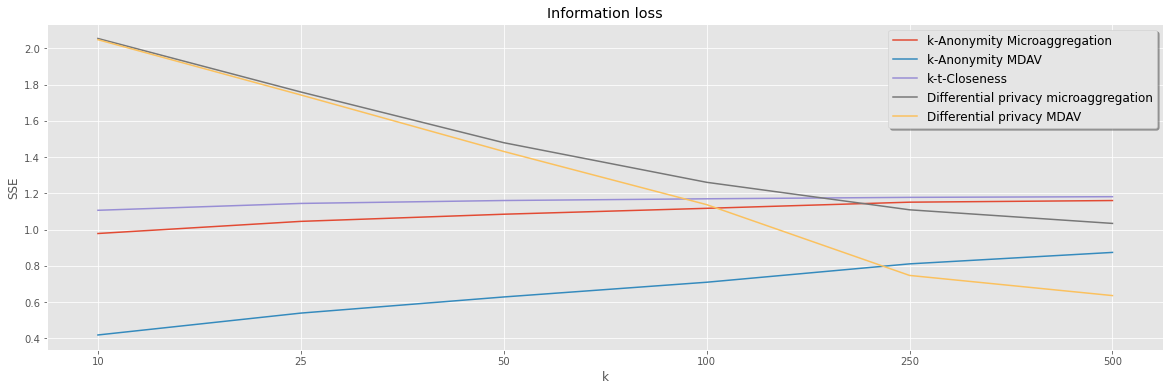

In [57]:
plt.figure(figsize=(20,6))
k_str = [str(k) for k in k_list]
l = [x.SSE for x in il_k_anom_micro]
plt.plot(k_str, l, label='k-Anonymity Microaggregation')
l = [x.SSE for x in il_k_anom_mdav]
plt.plot(k_str, l, label='k-Anonymity MDAV')
l = [x.SSE for x in il_t_clos]
plt.plot(k_str, l, label='k-t-Closeness')
l = [x.SSE for x in il_dp_micro]
plt.plot(k_str, l, label='Differential privacy microaggregation')
l = [x.SSE for x in il_dp_mdav]
plt.plot(k_str, l, label='Differential privacy MDAV')
plt.legend(loc='best', shadow=True, fontsize='12')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Information loss')
plt.xticks(k_str)
plt.show()

### 6.7 Comparative of methods
#### Disclosure risk (% matching in record linkage)

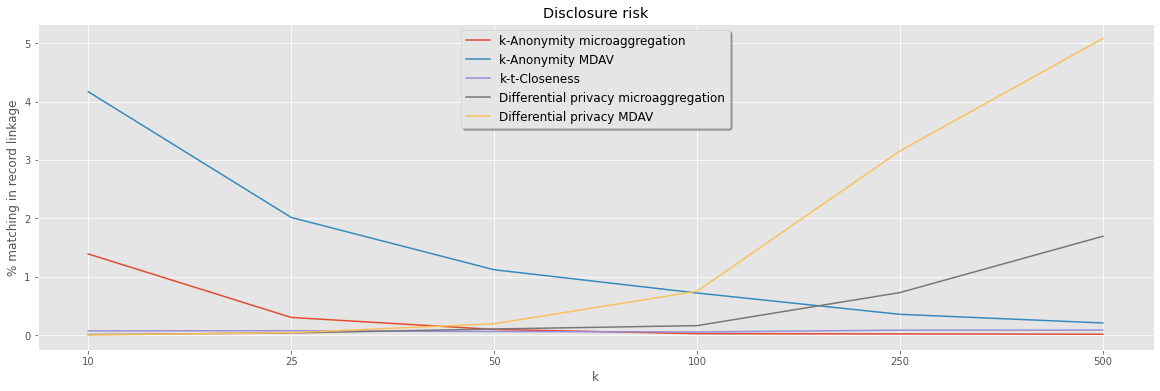

In [58]:
plt.figure(figsize=(20,6))
k_str = [str(k) for k in k_list]
l = [x.percen for x in dr_k_anom_micro]
plt.plot(k_str, l, label='k-Anonymity microaggregation')
l = [x.percen for x in dr_k_anom_mdav]
plt.plot(k_str, l, label='k-Anonymity MDAV')
l = [x.percen for x in dr_t_clos]
plt.plot(k_str, l, label='k-t-Closeness')
l = [x.percen for x in dr_dp_micro]
plt.plot(k_str, l, label='Differential privacy microaggregation')
l = [x.percen for x in dr_dp_mdav]
plt.plot(k_str, l, label='Differential privacy MDAV')
plt.legend(loc='best', shadow=True, fontsize='12')
plt.xlabel('k')
plt.ylabel('% matching in record linkage')
plt.title('Disclosure risk')
plt.xticks(k_str)
plt.show()

### 6.8 Comparative of methods
#### Runtime (seconds)

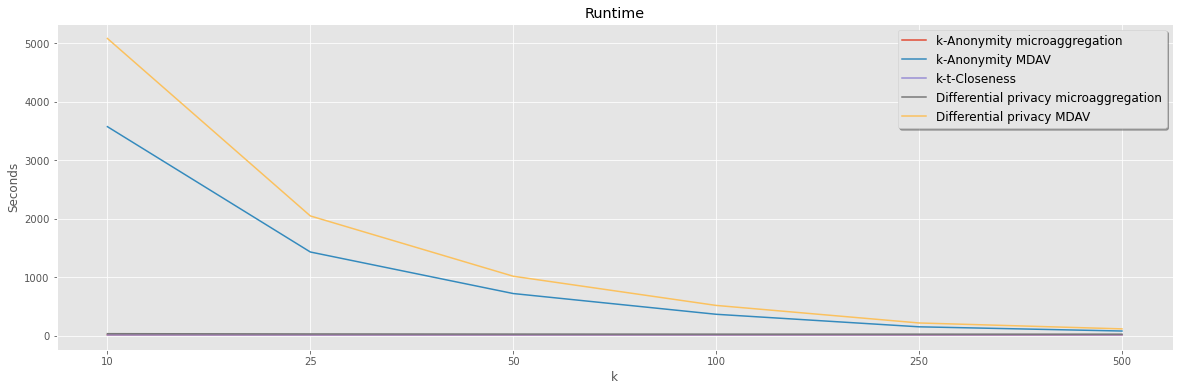

In [59]:
plt.figure(figsize=(20,6))
k_str = [str(k) for k in k_list]
plt.plot(k_str, run_k_anom_micro, label='k-Anonymity microaggregation')
plt.plot(k_str, run_k_anom_mdav, label='k-Anonymity MDAV')
plt.plot(k_str, run_t_clos, label='k-t-Closeness')
plt.plot(k_str, run_dp_micro, label='Differential privacy microaggregation')
plt.plot(k_str, run_dp_mdav, label='Differential privacy MDAV')
plt.legend(loc='best', shadow=True, fontsize='12')
plt.xlabel('k')
plt.ylabel('Seconds')
plt.title('Runtime')
plt.xticks(k_str)
plt.show()

========================================================================================================================
## 7. Compatibility with Sequential Privacy Frames
### Anonymization of the toy data set

In [1]:
from anonymization.src.algorithms.anonymization_scheme import Anonymization_scheme
from anonymization.src.algorithms.k_anonymity import K_anonymity
from anonymization.src.algorithms.mdav import Mdav
from anonymization.src.algorithms.microaggregation import Microaggregation
from anonymization.src.utils import utils
from PrivacyLibDevelop.sequentialprivacyframe import SequentialPrivacyFrame
from anonymization.src.entities.dataset_SPF import Dataset_SPF
from anonymization.src.utils import constants
from anonymization.src.utils.sensitivity_type import Sensitivity_type
from anonymization.src.attribute_types.attribute_type import Attribute_type

#### Following, it is indicated the path to the csv file containing the data set and the path to the xml file describing the attributes in the data set. Inside the xml file, there is a detailed descritpion about how to fill this xml file in order to properly configure the different attribute types in the data set

In [2]:
path_csv = "./anonymization/input_datasets/ToyDataset.txt"
path_settings = "./anonymization/input_datasets/metadata_ToyDataset.xml"

#### 7.1 Sequential Privacy Frame data is created from the csv dataset

In [3]:
spf = SequentialPrivacyFrame.from_file(path_csv, elements=["lat","lng"], sequence_id="seq")

In [4]:
dataset = Dataset_SPF(spf, path_settings=path_settings)
dataset.description()

Loading dataset
Dataset loaded: spf
Records loaded: 23
Dataset: spf
Dataset head:


,datetime,uid,sequence,elements,order
1,2011-02-03 09:34:04,1,1,"(43.544270000000004, 10.32615)",1
0,2011-02-03 08:34:04,1,1,"(43.843013899999995, 10.507994)",2
2,2011-02-03 10:34:04,1,2,"(43.708529999999996, 10.4036)",1
3,2011-02-04 10:34:04,1,2,"(43.77925, 11.246260000000001)",2
4,2011-02-03 08:34:04,2,1,"(43.843013899999995, 10.507994)",1



Dataset description:
Data set: spf
Records: 23
Attributes:


,Name,Attribute_type,Sensitivity_type
0,datetime,datetime,quasi_identifier
1,uid,numerical_discrete,identifier
2,sequence,numerical_discrete,identifier
3,elements,coordinate,quasi_identifier
4,order,numerical_discrete,identifier


#### 7.2 The metadata describing the attributes in the data set have been automatically embedded into the dataframe 
The attribute Dataframe.attrs has persistence and it is a good way to embed metadata into the dataframe

In [5]:
print(spf.attrs["attrs_settings"])

{'datetime': {'sensitivity_type': 'quasi_identifier', 'attribute_type': ['datetime', 'anonymization.src.attribute_types.datetime', 'datetime', 'Datetime']}, 'uid': {'sensitivity_type': 'identifier', 'attribute_type': ['numerical_discrete', 'anonymization.src.attribute_types.numerical_discrete', 'numerical_discrete', 'Numerical_discrete']}, 'sequence': {'sensitivity_type': 'identifier', 'attribute_type': ['numerical_discrete', 'anonymization.src.attribute_types.numerical_discrete', 'numerical_discrete', 'Numerical_discrete']}, 'elements': {'sensitivity_type': 'quasi_identifier', 'attribute_type': ['coordinate', 'anonymization.src.attribute_types.coordinate', 'coordinate', 'Coordinate']}, 'order': {'sensitivity_type': 'identifier', 'attribute_type': ['numerical_discrete', 'anonymization.src.attribute_types.numerical_discrete', 'numerical_discrete', 'Numerical_discrete']}}


#### 7.3 The data set is anonymized, in this case, applying k_anonymity via MDAV with a privacy level of k=5

In [6]:
k = 5
anonymization_scheme = K_anonymity(dataset, k)
algorithm = Mdav()
# algorithm = Microaggregation()
anonymization_scheme.calculate_anonymization(algorithm)

Anonymizing k-Anonymity, k = 5 via MDAV



Anonymization runtime: 0:00:00


#### 7.4 Information loss and disclosure risk metrics are calculated by comparing original and anonymized data set  
Information loss metrics calculated: Sum of Square Error (SSE) and, for each attribute, mean and variance

Disclosure risk metric calculated: record linkage

In [7]:
information_loss = Anonymization_scheme.calculate_information_loss(dataset, anonymization_scheme.anonymized_dataset)
information_loss.description()
disclosure_risk = Anonymization_scheme.calculate_fast_record_linkage(dataset, anonymization_scheme.anonymized_dataset)
disclosure_risk.description()

Calculating information loss metrics

Information loss metrics:
SSE: 0.396


,Name,Original mean,Anonymized mean,Original variance,Anonymized variance
0,datetime,2011-02-04 05:28:50.956522,2011-02-04 05:28:50.956522,2.955909e+09,1.778197e+09
1,uid,3.65217,1,4.086957e+00,0.000000e+00
2,sequence,1.47826,1,8.260870e-01,0.000000e+00
3,elements,43.73497221956522:10.60626095652174,43.73497221956522:10.606260956521739,1.309318e-01,1.212078e-01
4,order,1.52174,1,6.521739e-01,0.000000e+00


Calculating fast record linkage (disclosure risk), window size = 23



Disclosure risk: 3.000 (13.04%)


#### 7.5 The anonymized dataset can be reverted to sequential privacy frame format 

In [8]:
spf_anom = anonymization_scheme.anonymized_dataset_to_SPF()
spf_anom

<class 'anonymization.src.entities.dataset_SPF.Dataset_SPF'>


,datetime,uid,sequence,elements,order
1,2011-02-03 09:34:04,1,1,"(43.642826, 10.372620000000001)",1
0,2011-02-04 04:26:34,1,1,"(43.697363968750004, 10.413704)",1
2,2011-02-03 09:34:04,1,1,"(43.642826, 10.372620000000001)",1
3,2011-02-04 16:34:04,1,1,"(43.77925, 11.246260000000001)",1
4,2011-02-04 04:26:34,1,1,"(43.697363968750004, 10.413704)",1
5,2011-02-03 09:34:04,1,1,"(43.642826, 10.372620000000001)",1
6,2011-02-04 15:58:04,1,1,"(43.84301386, 10.507994)",1
7,2011-02-04 04:26:34,1,1,"(43.697363968750004, 10.413704)",1
8,2011-02-03 09:34:04,1,1,"(43.642826, 10.372620000000001)",1
9,2011-02-03 09:34:04,1,1,"(43.642826, 10.372620000000001)",1


In [9]:
type(spf_anom)

PrivacyLibDevelop.sequentialprivacyframe.SequentialPrivacyFrame

#### 7.6 The metadata describing the attributes can be hardcoded (instead of read from xml)

In [10]:
path_csv = "./anonymization/input_datasets/ToyDataset.txt"
spf = SequentialPrivacyFrame.from_file(path_csv, elements=["lat","lng"], sequence_id="seq")

In [11]:
settings = {"elements": {constants.SENSITIVITY_TYPE: Sensitivity_type.QUASI_IDENTIFIER.value,
                         constants.ATTRIBUTE_TYPE: Attribute_type.COORDINATE.value},
            "datetime": {constants.SENSITIVITY_TYPE: Sensitivity_type.QUASI_IDENTIFIER.value,
                         constants.ATTRIBUTE_TYPE: Attribute_type.DATETIME.value},
            "uid":      {constants.SENSITIVITY_TYPE: Sensitivity_type.IDENTIFIER.value,
                         constants.ATTRIBUTE_TYPE: Attribute_type.NUMERICAL_DISCRETE.value},
            "sequence": {constants.SENSITIVITY_TYPE: Sensitivity_type.IDENTIFIER.value,
                         constants.ATTRIBUTE_TYPE: Attribute_type.NUMERICAL_DISCRETE.value},
            "order":    {constants.SENSITIVITY_TYPE: Sensitivity_type.IDENTIFIER.value,
                         constants.ATTRIBUTE_TYPE: Attribute_type.NUMERICAL_DISCRETE.value}}

In [12]:
dataset = Dataset_SPF(spf, attrs_settings=settings)

Loading dataset
Dataset loaded: spf
Records loaded: 23


#### 7.7 Also, the metadata describing the attributes in the data set have been automatically embedded into the dataframe

In [13]:
print(spf.attrs["attrs_settings"])

{'elements': {'sensitivity_type': 'quasi_identifier', 'attribute_type': ['coordinate', 'anonymization.src.attribute_types.coordinate', 'coordinate', 'Coordinate']}, 'datetime': {'sensitivity_type': 'quasi_identifier', 'attribute_type': ['datetime', 'anonymization.src.attribute_types.datetime', 'datetime', 'Datetime']}, 'uid': {'sensitivity_type': 'identifier', 'attribute_type': ['numerical_discrete', 'anonymization.src.attribute_types.numerical_discrete', 'numerical_discrete', 'Numerical_discrete']}, 'sequence': {'sensitivity_type': 'identifier', 'attribute_type': ['numerical_discrete', 'anonymization.src.attribute_types.numerical_discrete', 'numerical_discrete', 'Numerical_discrete']}, 'order': {'sensitivity_type': 'identifier', 'attribute_type': ['numerical_discrete', 'anonymization.src.attribute_types.numerical_discrete', 'numerical_discrete', 'Numerical_discrete']}}


#### 7.8 The metadata describing the attributes in the data set can be embedded manually

In [14]:
path_csv = "./anonymization/input_datasets/ToyDataset.txt"
spf = SequentialPrivacyFrame.from_file(path_csv, elements=["lat","lng"], sequence_id="seq")

In [15]:
settings = {"elements": {constants.SENSITIVITY_TYPE: Sensitivity_type.QUASI_IDENTIFIER.value,
                         constants.ATTRIBUTE_TYPE: Attribute_type.COORDINATE.value},
            "datetime": {constants.SENSITIVITY_TYPE: Sensitivity_type.QUASI_IDENTIFIER.value,
                         constants.ATTRIBUTE_TYPE: Attribute_type.DATETIME.value},
            "uid":      {constants.SENSITIVITY_TYPE: Sensitivity_type.IDENTIFIER.value,
                         constants.ATTRIBUTE_TYPE: Attribute_type.NUMERICAL_DISCRETE.value},
            "sequence": {constants.SENSITIVITY_TYPE: Sensitivity_type.IDENTIFIER.value,
                         constants.ATTRIBUTE_TYPE: Attribute_type.NUMERICAL_DISCRETE.value},
            "order":    {constants.SENSITIVITY_TYPE: Sensitivity_type.IDENTIFIER.value,
                         constants.ATTRIBUTE_TYPE: Attribute_type.NUMERICAL_DISCRETE.value}}

It should be useful to add a method in the SequentialPrivacyFrame class to do this  

In [16]:
spf.attrs["attrs_settings"] = settings

In [17]:
print(spf.attrs["attrs_settings"])

{'elements': {'sensitivity_type': 'quasi_identifier', 'attribute_type': ['coordinate', 'anonymization.src.attribute_types.coordinate', 'coordinate', 'Coordinate']}, 'datetime': {'sensitivity_type': 'quasi_identifier', 'attribute_type': ['datetime', 'anonymization.src.attribute_types.datetime', 'datetime', 'Datetime']}, 'uid': {'sensitivity_type': 'identifier', 'attribute_type': ['numerical_discrete', 'anonymization.src.attribute_types.numerical_discrete', 'numerical_discrete', 'Numerical_discrete']}, 'sequence': {'sensitivity_type': 'identifier', 'attribute_type': ['numerical_discrete', 'anonymization.src.attribute_types.numerical_discrete', 'numerical_discrete', 'Numerical_discrete']}, 'order': {'sensitivity_type': 'identifier', 'attribute_type': ['numerical_discrete', 'anonymization.src.attribute_types.numerical_discrete', 'numerical_discrete', 'Numerical_discrete']}}
